#side project
#1.題目：A公司業務銷售之分析報告
#2.內容：你是A公司的新進商業數據分析師，A公司今年2016年業績大幅下滑，公司想請你分析歷年數據後，寫份摘要報告，從各種不同角度分析，包括：『不同業務單位，不同業務員，不同產品，逐年，每季，每月』的分析，找出業績下降的原因，以及如何改善。
# **請多用定量描述的方式，來證明你分析觀點的可靠性、準確性與權威性，以建立個人數據分析的品牌與形象。**
#3.使用技術：分群技術(groupby），樞紐分析表，交叉分析圖（groupby..agg..unstack)，視覺化(matplotlib)。三種百分比表格來定量分析各種數據的物理意義。groupby..apply做樞紐分析表格的視覺化標註。分群+排序做強弱項分析。
#4.分析題目：60題
#5.學號：110AB0018
#6.姓名：陳威成
#7.學校系所：資訊與財金管理系
請結果盡量做的和答案一樣

# 安裝網頁中文字型

In [ ]:
#--------------------------------------
# colab繪圖顯示繁體中文
#--------------------------------------
import matplotlib
#colab顯示繁體中文 問題：matplotlib繪圖，會發生中文無法顯示的問題
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: import: command not found
--2023-06-23 18:01:22--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.141.138, 74.125.141.139, 74.125.141.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lm9ggv32bh10uhue327h7cg29f4pm708/1687543275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d6aaa2ed-c017-4a15-ac5c-30e662b38c15 [following]
--2023-06-23 18:01:25--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lm9ggv32bh10uhue327h7cg29f4pm708/1687543275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d6aaa2ed-c017-4a15-ac5c-30e662b38c15
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.97.132, 2607:f

# 分析1：讀入業務銷售的資料檔案csv
檔案：https://acupun.site/lecture/pandas/example/resource/sales.csv


In [ ]:
import pandas as pd
df=pd.read_csv("https://acupun.site/lecture/pandas/example/resource/sales.csv")
df

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額
0,2013-01-03,業務3,Mary,男,手機,1084,79291
1,2013-01-06,業務3,Allen,男,手機,620,107992
2,2013-01-08,業務3,Sam,男,手機,2201,91219
3,2013-01-08,業務3,Mary,男,平板,1301,86219
4,2013-01-09,業務2,Peter,男,手機,1331,79836
...,...,...,...,...,...,...,...
891,2016-10-23,業務1,Jorden,男,手機,937,207198
892,2016-10-23,業務4,Chris,男,電腦,2309,85962
893,2016-10-25,業務4,Coby,女,手機,1389,122263
894,2016-10-26,業務4,Robin,男,手機,545,81999


# 分析2：統計本年度，每個業務單位的銷售次數

In [ ]:
df.groupby("業務單位").agg({"業務員":"size"})\
  .rename(columns={"業務員":"銷售次數"})

,銷售次數
業務單位,
業務1,228
業務2,228
業務3,232
業務4,208


# 分析3：統計本年度，每個業務單位的銷售總金額

In [ ]:
df.groupby("業務單位").agg({"銷售金額":"sum"})\
  .rename(columns={"銷售金額":"年度銷售金額"})

,年度銷售金額
業務單位,
業務1,41849234
業務2,18533423
業務3,17242096
業務4,18242087


# 分析4：統計本年度，每個業務單位的『銷售總量，銷售總金額』

In [ ]:
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析5：熒光筆標示：『銷售總量最高值，銷售總金額最高值』

In [ ]:
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_max(subset=["銷售總量","銷售總金額"],color="yellow")

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析6：熒光筆標示：『銷售總量最低值，銷售總金額最低值』

In [ ]:
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_min(subset=["銷售總量","銷售總金額"],color="pink")

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析7：熒光筆標示：銷售總金額最高的是哪一個？（黃色）

In [ ]:
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_max(subset="銷售總金額",color="yellow")

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析8：熒光筆標示：銷售總金額欄位（黃色）

In [ ]:
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_between(subset="銷售總金額",color="yellow")

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


In [ ]:
df2=df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\

def Tmoney(x):
  return "background-color:yellow;"
df2.style.applymap(Tmoney,subset="銷售總金額")

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


In [ ]:
df2=df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})
def Tmoney(x):
  if x.name=="銷售總金額":
    return ["background-color:yellow"]*len(df2.index)
  else:
    return ["background-color:"]*len(df2.index)
df2.style.apply(Tmoney,axis=0)

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析9：漸層圖標示：銷售總量欄位（Reds）

In [ ]:
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.background_gradient(subset="銷售總量",cmap="Reds") #color map

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析10：畫圖『業務單位 vs 銷售總金額』

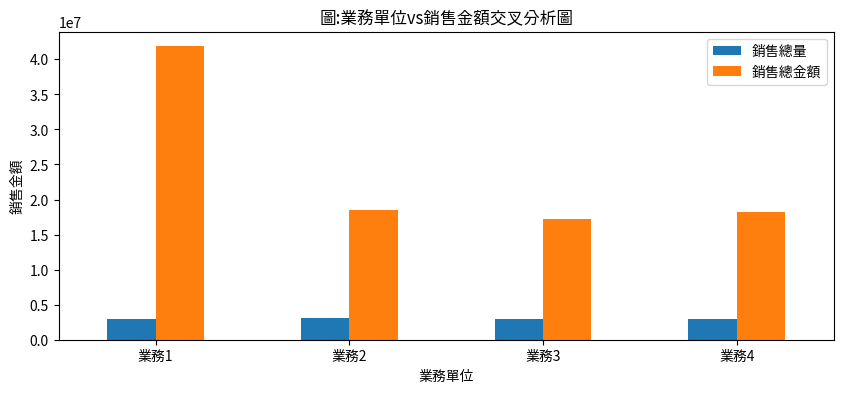

In [ ]:
import matplotlib.pyplot as plt
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .plot(kind="bar",legend=True,rot=0,title="圖:業務單位vs銷售金額交叉分析圖",figsize=(10,4))
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析11：畫圖『業務單位 vs 銷售總金額』，加上左右y軸，對應圖例

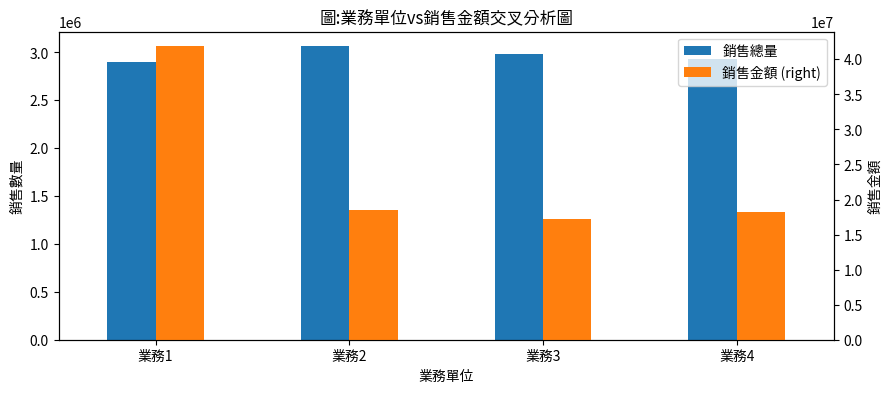

In [ ]:
import matplotlib.pyplot as plt
ax1=df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量"})\
  .plot(kind="bar",legend=True,rot=0,title="圖:業務單位vs銷售金額交叉分析圖",figsize=(10,4),secondary_y="銷售金額")
ax1.set_xlabel("業務單位")
ax1.set_ylabel("銷售數量")
ax1.right_ax.set_ylabel("銷售金額")
plt.show()

# 分析12：畫圖『業務單位 vs 銷售總金額』，分成上下圖

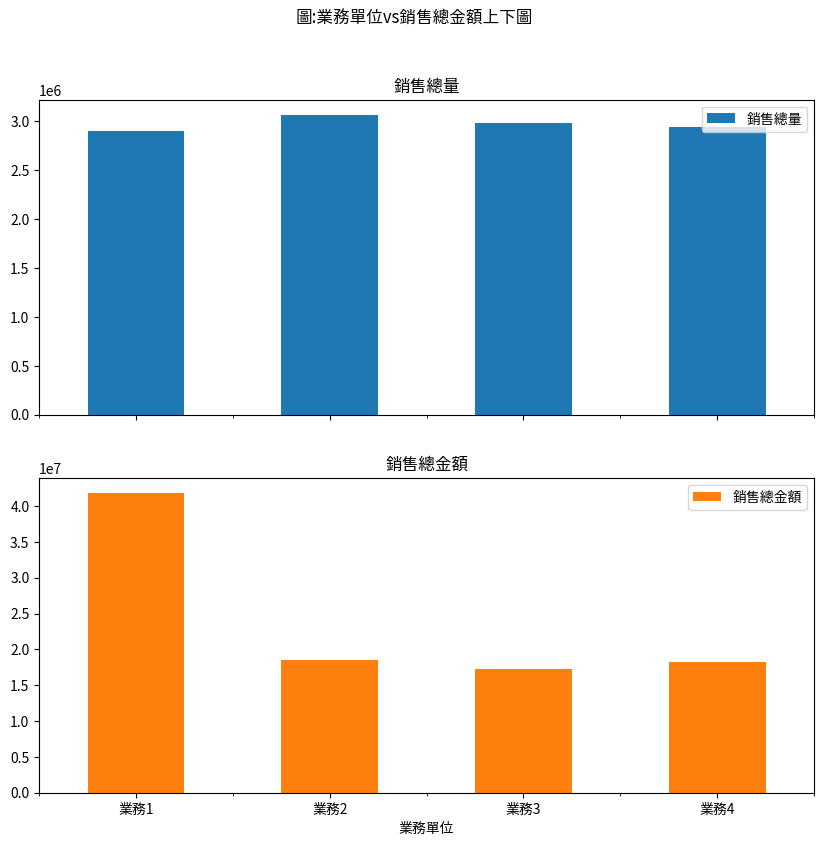

In [ ]:
import matplotlib.pyplot as plt
df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .plot(kind="bar",legend=True,rot=0,subplots=True,title="圖:業務單位vs銷售總金額上下圖",figsize=(10,9))
plt.xlabel("業務單位")
plt.show()

# 分析13：顯示每一位業務員的年度銷售總金額，排序，高到低

In [ ]:
df.groupby("業務員").agg({"銷售金額":"sum"})\
  .sort_values("銷售金額",ascending=False)

,銷售金額
業務員,
Terry,14141090
Thomas,9817364
Jorden,9412480
John,8478300
Steve,5560626
Eric,5552115
Simon,5363826
Allen,5356577
Roger,5058574


# 分析14：請顯示，業務單位1，業務單位3，的每位業務員的銷售總金額

In [ ]:
a1=df["業務單位"]=="業務1"
print("單位=業務1的資料：")
display(df[a1].groupby("業務員").agg({"銷售金額":"sum"}))

a2=df["業務單位"]=="業務3"
print("單位=業務3的資料：")
df[a2].groupby("業務員").agg({"銷售金額":"sum"})

單位=業務1的資料：


,銷售金額
業務員,
John,8478300
Jorden,9412480
Terry,14141090
Thomas,9817364


單位=業務3的資料：


,銷售金額
業務員,
Allen,5356577
Mary,2817989
Sam,3506904
Steve,5560626


# 分析15：排序：根據每個業務單位的字母順序(低到高)，顯示不同單位，不同業務員的銷售金額

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})

銷售金額
業務單位 業務員             
業務1  John     8478300
     Jorden   9412480
     Terry   14141090
     Thomas   9817364
業務2  Alisa    3440513
     Eric     5552115
     Peter    4482221
     Roger    5058574
業務3  Allen    5356577
     Mary     2817989
     Sam      3506904
     Steve    5560626
業務4  Chris    4068670
     Coby     4947153
     Robin    3862438
     Simon    5363826

# 分析16：分群(業務單位,業務員)後，計算銷售金額，再排序（先依照業務單位排(低到高)，若同單位，再依銷售金額排(高到低)）

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,False])

銷售金額
業務單位 業務員             
業務1  Terry   14141090
     Thomas   9817364
     Jorden   9412480
     John     8478300
業務2  Eric     5552115
     Roger    5058574
     Peter    4482221
     Alisa    3440513
業務3  Steve    5560626
     Allen    5356577
     Sam      3506904
     Mary     2817989
業務4  Simon    5363826
     Coby     4947153
     Chris    4068670
     Robin    3862438

# 分析17：分群(業務單位,業務員),再計算銷售金額後，顯示每個單位的銷售第一名是誰？
顯示表格標題，表格寬度200px，文字大小24px

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,False])\
   .groupby("業務單位")\
   .head(1)\
   .style.set_caption("表:顯示每個單位的銷售第一名")\
   .set_properties(**{'width':'200px','font-size':'24px'})

,,銷售金額
業務單位,業務員,
業務1,Terry,14141090
業務2,Eric,5552115
業務3,Steve,5560626
業務4,Simon,5363826


# 分析18：分群(業務單位,業務員),再計算銷售金額後，顯示各單位第一名，但不顯示業務員姓名

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,False])\
   .groupby("業務單位")\
   .first()

,銷售金額
業務單位,
業務1,14141090
業務2,5552115
業務3,5560626
業務4,5363826


# 分析19：分群(業務單位,業務員),再計算銷售金額後，顯示各單位前3名（顯示業務員姓名）
顯示表格標題，表格寬度200px，文字大小16px

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,False])\
   .groupby("業務單位")\
   .head(3)\
   .style.set_caption("表:顯示每個單位的銷售前3名")\
   .set_properties(**{'width':'200px','font-size':'16px'})

# 分析20：分群(業務單位,業務員),再計算銷售金額後，顯示每個單位的銷售最後一名是誰？
顯示表格標題，表格寬度200px，文字大小16px

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,False])\
   .groupby("業務單位")\
   .tail(1)\
   .style.set_caption("表:顯示每個單位的銷售前3名")\
   .set_properties(**{'width':'200px','font-size':'16px'})

,,銷售金額
業務單位,業務員,
業務1,John,8478300
業務2,Alisa,3440513
業務3,Mary,2817989
業務4,Robin,3862438


# 分析21：分群(業務單位,業務員),再計算銷售金額後，顯示每個單位的銷售第一名的index

In [ ]:
df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,False])\
   .groupby("業務單位")\
   .idxmax()

,銷售金額
業務單位,
業務1,"(業務1, Terry)"
業務2,"(業務2, Eric)"
業務3,"(業務3, Steve)"
業務4,"(業務4, Simon)"


# 分析22：分群(業務單位,業務員),再計算銷售金額後，熒光筆標註每個單位的銷售第一名

In [ ]:
df2=df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,True])

def grade(x):
  a1=["background-color:yellow" if item in list(x.groupby("業務單位").idxmax()) else "" for item in x.index]
  return a1
df2.style.apply(grade,axis=0)

# 分析23：熒光筆標示每個業務單位的最高銷售總金額(黃色)，最低值(粉紅色)

In [ ]:
df2=df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
   .sort_values(["業務單位","銷售金額"],ascending=[True,True])

def grade(x):
  a1=["background-color:yellow" if item in list(x.groupby("業務單位").idxmax()) else "" for item in x.index]
  return a1

def grade2(x):
  a2=["background-color:pink" if item in list(x.groupby("業務單位").idxmin()) else "" for item in x.index]
  return a2
df2.style.apply(grade,axis=0).apply(grade2,axis=0)

# 分析24：分群(業務單位,銷售產品),再計算銷售金額後，建立交叉分析表（使用groupby..unstack)

In [ ]:
df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
   .unstack(level="銷售產品")

銷售金額                            
銷售產品        平板        手機       鍵盤       電腦
業務單位                                      
業務1   11293148  13154647  7825479  9575960
業務2    4818464   5503935  3429055  4781969
業務3    3605371   5973702  3730727  3932296
業務4    4233983   8016938  2660749  3330417

# 分析25：分群(業務單位,銷售產品),再計算銷售金額後，建立交叉分析表（使用pivot_table)

In [ ]:
df3=df.pivot_table(columns="銷售產品",index="業務單位",values="銷售金額",aggfunc="sum")
df3.columns.name="產品銷售金額"
df3

產品銷售金額,平板,手機,鍵盤,電腦
業務單位,,,,
業務1,11293148,13154647,7825479,9575960
業務2,4818464,5503935,3429055,4781969
業務3,3605371,5973702,3730727,3932296
業務4,4233983,8016938,2660749,3330417


# 分析26：把交叉分析表，加上千分位
分群(業務單位,業務員),再計算銷售金額後，建立交叉分析表
#方法1：df = pd.read_csv("data.csv", thousands=",")

#方法2：style.format(thousands=',')
參考官網教學：
https://pandas.pydata.org/docs/dev/reference/api/pandas.io.formats.style.Styler.format.html


In [ ]:
df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level="銷售產品")\
  .style.format(thousands=',')

# 分析27：畫圖：分群(業務單位,銷售產品)，再計算銷售金額後，建立交叉分析圖

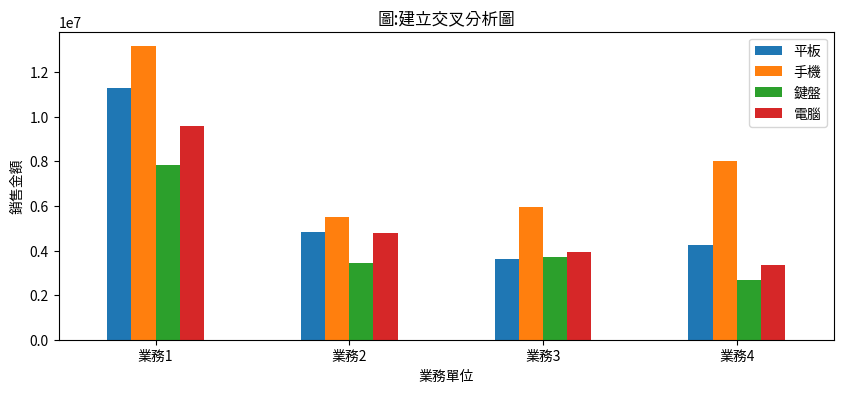

In [ ]:
import matplotlib.pyplot as plt

df4=df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level="銷售產品")
df4.columns=["平板","手機","鍵盤","電腦"]
df4.plot(kind="bar",legend=True,rot=0,title="圖:建立交叉分析圖",figsize=(10,4))
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析28：畫柱狀堆疊圖：分群(業務單位,銷售產品)，再計算銷售金額後，建立交叉分析圖(堆疊圖)

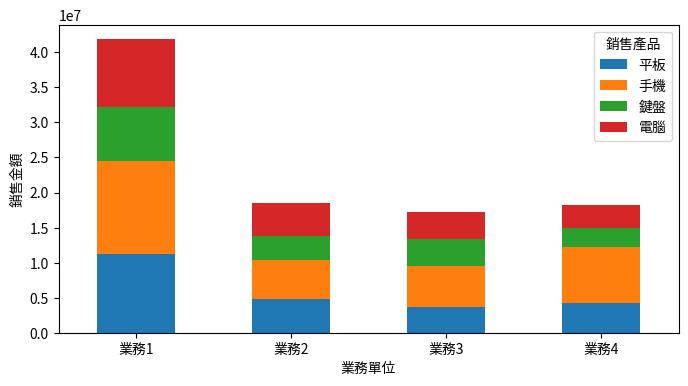

In [ ]:
import matplotlib.pyplot as plt

df4=df.groupby(["業務單位","銷售產品"])["銷售金額"].sum()\
  .unstack(level="銷售產品")
df4.plot(kind="bar",legend=True,rot=0,stacked=True,figsize=(8,4))
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

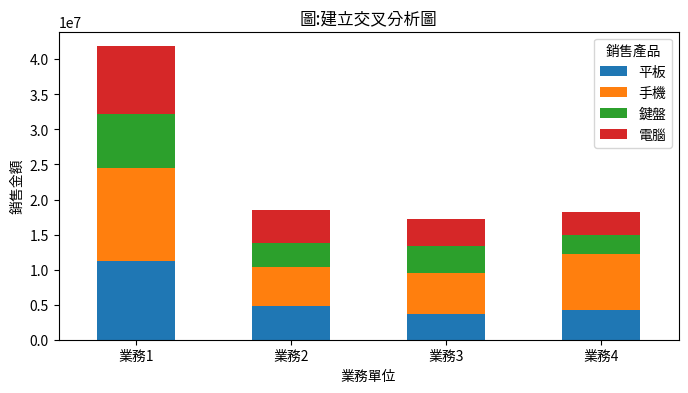

In [ ]:
import matplotlib.pyplot as plt

df4=df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level="銷售產品") #圖上的資訊
df4.columns=["平板","手機","鍵盤","電腦"]
df4.columns.names=["銷售產品"]
df4.plot(kind="bar",legend=True,rot=0,stacked=True,title="圖:建立交叉分析圖",figsize=(8,4))
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析29：交叉分析『業務單位，銷售產品』的銷售金額，最後計算業務銷售總和

In [ ]:
df5=df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
   .unstack(level="銷售產品")
df5.columns=["平板金額","手機金額","鍵盤金額","電腦金額"]
df5["業務銷售總和"]=df5.sum(axis=1)
df5

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,11293148,13154647,7825479,9575960,41849234
業務2,4818464,5503935,3429055,4781969,18533423
業務3,3605371,5973702,3730727,3932296,17242096
業務4,4233983,8016938,2660749,3330417,18242087


# 分析30：交叉分析『業務單位，銷售產品』的銷售金額，最後計算『業務銷售總和，產品銷售總和』

In [ ]:
df5=df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
   .unstack(level="銷售產品")
df5.columns=["平板金額","手機金額","鍵盤金額","電腦金額"]
df5["業務銷售總和"]=df5.sum(axis=1)
df5.loc["產品銷售總和"]=df5.sum(axis=0)
df5

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,11293148,13154647,7825479,9575960,41849234
業務2,4818464,5503935,3429055,4781969,18533423
業務3,3605371,5973702,3730727,3932296,17242096
業務4,4233983,8016938,2660749,3330417,18242087
產品銷售總和,23950966,32649222,17646010,21620642,95866840


# 分析31：使用pivot_table，快速建立交叉分析『業務單位，銷售產品』的銷售金額，並計算『業務銷售總和，產品銷售總和』

In [ ]:
df6=df.pivot_table(columns="銷售產品",index="業務單位",values="銷售金額",aggfunc="sum")
df6["總和"]=df6.sum(axis=1)
df6.loc["總和"]=df6.sum(axis=0)
df6

銷售產品,平板,手機,鍵盤,電腦,總和
業務單位,,,,,
業務1,11293148,13154647,7825479,9575960,41849234
業務2,4818464,5503935,3429055,4781969,18533423
業務3,3605371,5973702,3730727,3932296,17242096
業務4,4233983,8016938,2660749,3330417,18242087
總和,23950966,32649222,17646010,21620642,95866840


# 分析32：修改交叉分析表為『總計百分比表格』
（1）百分比表格，有三種：

**• 總計百分比：以總和當分母（右下角為100，右下角值=df.iloc[-1,-1]）**

• 欄的總和百分比：以欄的總和當分母。

• 列的總和百分比：以列的總和當分母。


In [ ]:
df6=df.groupby(["業務單位","銷售產品"]).agg({"銷售金額":"sum"})\
   .unstack(level="銷售產品")
df6.columns=["平板金額","手機金額","鍵盤金額","電腦金額"]
df6["業務銷售總和"]=df6.sum(axis=1)
df6.loc["產品銷售總和"]=df6.sum(axis=0)
(df6/df6.iloc[-1][-1]*100).round(2)

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,11.78,13.72,8.16,9.99,43.65
業務2,5.03,5.74,3.58,4.99,19.33
業務3,3.76,6.23,3.89,4.10,17.99
業務4,4.42,8.36,2.78,3.47,19.03
產品銷售總和,24.98,34.06,18.41,22.55,100.00


# 分析33：修改交叉分析表為『欄的總和百分比』
（1）百分比表格，有三種：

• 總計百分比：以總和當分母（右下角為100，右下角值=df.iloc[-1,-1]）

**• 欄的總和百分比：以欄的總和當分母。(欄位最下，都為100)**

• 列的總和百分比：以列的總和當分母

#（2）相除指令：df1.div(series, axis=0/1)

**axis=0：表示將除數series，以垂直方式去除（將series直放）**

**axis=1：表示將除數series，以水平方式去除（將series橫放）**


In [ ]:
(df6.div(df6.iloc[-1],axis=1)*100).round(2)

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,47.15,40.29,44.35,44.29,43.65
業務2,20.12,16.86,19.43,22.12,19.33
業務3,15.05,18.30,21.14,18.19,17.99
業務4,17.68,24.55,15.08,15.40,19.03
產品銷售總和,100.00,100.00,100.00,100.00,100.00


# 分析34：修改交叉分析表為『列的總和百分比』
（1）百分比表格，有三種：

• 總計百分比：以總和當分母（右下角為100，右下角值=df.iloc[-1,-1]）

• 欄的總和百分比：以欄的總和當分母。(欄位最下，都為100)

**• 列的總和百分比：以列的總和當分母。**

#（2）相除指令：df1.div(series, axis=0/1)

**axis=0：表示將除數series，以垂直方式去除（將series直放）**

**axis=1：表示將除數series，以水平方式去除（將series橫放）**

In [ ]:
(df6.div(df6["業務銷售總和"],axis=0)*100).round(2)

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,26.99,31.43,18.70,22.88,100.0
業務2,26.00,29.70,18.50,25.80,100.0
業務3,20.91,34.65,21.64,22.81,100.0
業務4,23.21,43.95,14.59,18.26,100.0
產品銷售總和,24.98,34.06,18.41,22.55,100.0


# 分析35：分3群，交叉分析『業務單位，業務員，銷售產品』的銷售金額

In [ ]:
df.groupby(["業務單位","業務員","銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level=2)

銷售金額                           
銷售產品              平板       手機       鍵盤       電腦
業務單位 業務員                                       
業務1  John    3029386  2849597  1135060  1464257
     Jorden  3467950  2219334  1715503  2009693
     Terry   2045086  4570886  3338603  4186515
     Thomas  2750726  3514830  1636313  1915495
業務2  Alisa    977354   865267  1017345   580547
     Eric    1805237  1273493  1029744  1443641
     Peter    978705  1766964   487997  1248555
     Roger   1057168  1598211   893969  1509226
業務3  Allen    868284  1994505  1272038  1221750
     Mary     537782  1074600   581461   624146
     Sam      712216  1274465   582955   937268
     Steve   1487089  1630132  1294273  1149132
業務4  Chris   1058980  1655202   419124   935364
     Coby    1217955  2597607   546286   585305
     Robin    609592  1937809   688969   626068
     Simon   1347456  1826320  1006370  1183680

# 分析36：使用pivot_table在交叉分析表，分3群，交叉分析『業務單位，業務員，銷售產品』的銷售金額

In [ ]:
df.pivot_table(columns="銷售產品",index=["業務單位","業務員"],values="銷售金額",aggfunc="sum")

銷售產品              平板       手機       鍵盤       電腦
業務單位 業務員                                       
業務1  John    3029386  2849597  1135060  1464257
     Jorden  3467950  2219334  1715503  2009693
     Terry   2045086  4570886  3338603  4186515
     Thomas  2750726  3514830  1636313  1915495
業務2  Alisa    977354   865267  1017345   580547
     Eric    1805237  1273493  1029744  1443641
     Peter    978705  1766964   487997  1248555
     Roger   1057168  1598211   893969  1509226
業務3  Allen    868284  1994505  1272038  1221750
     Mary     537782  1074600   581461   624146
     Sam      712216  1274465   582955   937268
     Steve   1487089  1630132  1294273  1149132
業務4  Chris   1058980  1655202   419124   935364
     Coby    1217955  2597607   546286   585305
     Robin    609592  1937809   688969   626068
     Simon   1347456  1826320  1006370  1183680

# 分析37：交叉分析『業務單位，銷售產品』的『銷售數量，銷售金額』總和

In [ ]:
df.pivot_table(columns="銷售產品",index="業務單位",values=["銷售數量","銷售金額"],aggfunc="sum")

銷售數量                              銷售金額                            
銷售產品      平板      手機      鍵盤      電腦        平板        手機       鍵盤       電腦
業務單位                                                                      
業務1   964118  787604  524559  625655  11293148  13154647  7825479  9575960
業務2   838569  683625  670289  870727   4818464   5503935  3429055  4781969
業務3   960288  839305  548427  631464   3605371   5973702  3730727  3932296
業務4   855705  992009  420943  666656   4233983   8016938  2660749  3330417

In [ ]:
df.groupby(["業務單位","銷售產品"]).agg({"銷售數量":"sum","銷售金額":"sum"})\
  .unstack(level="銷售產品")

銷售數量                              銷售金額                            
銷售產品      平板      手機      鍵盤      電腦        平板        手機       鍵盤       電腦
業務單位                                                                      
業務1   964118  787604  524559  625655  11293148  13154647  7825479  9575960
業務2   838569  683625  670289  870727   4818464   5503935  3429055  4781969
業務3   960288  839305  548427  631464   3605371   5973702  3730727  3932296
業務4   855705  992009  420943  666656   4233983   8016938  2660749  3330417

# 分析38：分析『業務單位』的『銷售數量，銷售金額』之『最高，最低，平均，總和』

In [ ]:
df.groupby("業務單位").agg({"銷售數量":["max","min","mean","sum"],"銷售金額":["max","min","mean","sum"]})\
  .rename(columns={"max":"最高","min":"最低","mean":"平均","sum":"總和"},level=1)\
  .round(2)

銷售數量                            銷售金額                             
         最高   最低        平均       總和      最高      最低         平均        總和
業務單位                                                                    
業務1   48446  522  12727.79  2901936  255873  135247  183549.27  41849234
業務2   48475  510  13435.13  3063210  133373   35537   81286.94  18533423
業務3   48399  514  12842.60  2979484  133574   35047   74319.38  17242096
業務4   48485  516  14112.08  2935313  145924   35551   87702.34  18242087

# 分析39：分析『業務單位』的『銷售數量平均，銷售金額總和』

In [ ]:
df7=df.groupby("業務單位").agg({"銷售數量":"mean","銷售金額":"sum"})\
  .round(2)
df7.columns=[["銷售數量","銷售金額"],["平均","總和"]]
df7

,銷售數量,銷售金額
,平均,總和
業務單位,,
業務1,12727.79,41849234
業務2,13435.13,18533423
業務3,12842.60,17242096
業務4,14112.08,18242087


# 分析40：新增欄位『年』from 銷售日期，隨機顯示5筆


In [ ]:
df["銷售日期"]=pd.to_datetime(df["銷售日期"])
df["年"]=df["銷售日期"].dt.year
df.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年
81,2013-04-24,業務2,Eric,女,鍵盤,48406,59319,2013
140,2013-07-07,業務2,Roger,男,平板,1976,51209,2013
727,2016-01-25,業務4,Chris,男,鍵盤,1510,52181,2016
802,2016-06-09,業務1,John,男,平板,46687,152754,2016
421,2014-09-16,業務3,Steve,男,平板,2051,65999,2014


# 分析41：新增欄位『月』from 銷售日期，隨機顯示5筆

In [ ]:
df["銷售日期"]=pd.to_datetime(df["銷售日期"])
df["月"]=df["銷售日期"].dt.month
df.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年,月
804,2016-06-16,業務3,Sam,男,平板,46981,55265,2016,6
169,2013-08-12,業務1,Terry,女,手機,1741,227343,2013,8
555,2015-05-07,業務1,Jorden,男,平板,47381,173267,2015,5
280,2014-02-10,業務3,Mary,男,鍵盤,1967,44716,2014,2
376,2014-07-01,業務1,Thomas,男,手機,1960,191686,2014,7


# 分析42：新增欄位『季』from 銷售日期，隨機顯示5筆

In [ ]:
df["銷售日期"]=pd.to_datetime(df["銷售日期"])
df["季"]=df["銷售日期"].dt.quarter
df.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年,月,季
101,2013-05-29,業務1,Terry,女,電腦,46505,169537,2013,5,2
349,2014-05-15,業務4,Coby,女,手機,48485,130014,2014,5,2
871,2016-09-18,業務2,Peter,男,電腦,918,49419,2016,9,3
778,2016-04-21,業務2,Alisa,男,鍵盤,47130,50720,2016,4,2
832,2016-07-19,業務2,Peter,男,手機,2263,98308,2016,7,3


# 分析43：新增欄位『星期幾』from 銷售日期，隨機顯示5筆

**注意：要加上()**


In [ ]:
df["銷售日期"]=pd.to_datetime(df["銷售日期"])
df["星期幾"]=df["銷售日期"].dt.day_name()
df.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年,月,季,星期幾
575,2015-05-31,業務1,Thomas,男,鍵盤,47123,164625,2015,5,2,Sunday
783,2016-05-05,業務2,Peter,男,電腦,48242,82751,2016,5,2,Thursday
840,2016-08-03,業務2,Peter,男,平板,1986,64690,2016,8,3,Wednesday
492,2015-01-14,業務3,Sam,男,電腦,1161,74218,2015,1,1,Wednesday
264,2014-01-12,業務4,Simon,女,平板,1365,88501,2014,1,1,Sunday


# 分析44：統計分析，本公司逐年的年銷售金額比較表

In [ ]:
df.groupby("年").agg({"銷售金額":"sum"})

,銷售金額
年,
2013,25727805
2014,22838772
2015,28060594
2016,19239669


# 分析45：統計分析，本公司逐年的年銷售金額比較表
**方法限定1：若沒有先建立欄位『年』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df.groupby(df["銷售日期"].dt.year).agg({"銷售金額":"sum"})

,銷售金額
銷售日期,
2013,25727805
2014,22838772
2015,28060594
2016,19239669


# 分析46：畫圖，統計分析，本公司逐年的年銷售金額比較圖


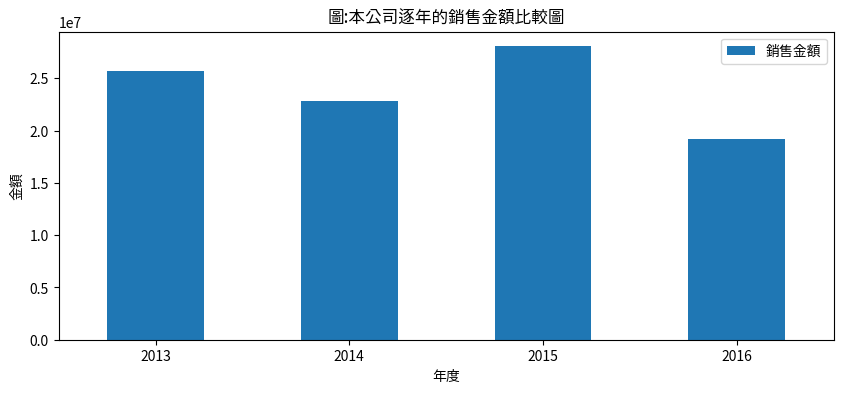

In [ ]:
import matplotlib.pyplot as plt

df.groupby(df["銷售日期"].dt.year).agg({"銷售金額":"sum"})\
  .plot(kind="bar",legend=True,rot=0,title="圖:本公司逐年的銷售金額比較圖",figsize=(10,4))
plt.xlabel("年度")
plt.ylabel("金額")
plt.show()

# 分析47：統計分析，本公司每月的銷售金額比較表
**方法限定1：若沒有先建立欄位『月』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df8=df.groupby(df["銷售日期"].dt.month_name()).agg({"銷售金額":"sum"})
df8.index.name="銷售月份"
df8

,銷售金額
銷售月份,
April,7797925
August,8773711
December,4783808
February,8113139
January,9739357
July,10860019
June,7888861
March,7294062
May,8652947


# 分析48：畫圖：統計分析，本公司每月的銷售金額比較圖
**方法限定1：若沒有先建立欄位『月』，而是直接由原始資料df，直接一行分析，該如何做？**

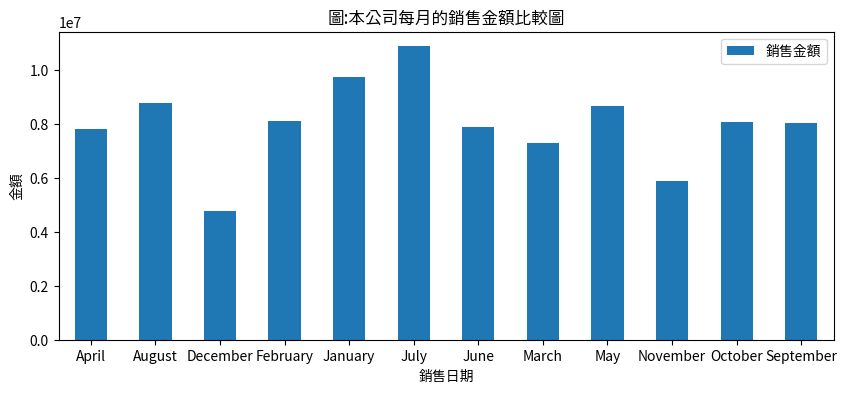

In [ ]:
import matplotlib.pyplot as plt

df.groupby(df["銷售日期"].dt.month_name()).agg({"銷售金額":"sum"})\
  .plot(kind="bar",legend=True,rot=0,title="圖:本公司每月的銷售金額比較圖",figsize=(10,4))
plt.xlabel("銷售日期")
plt.ylabel("金額")
plt.show()

# 分析49：統計分析，本公司每年各類產品的銷售金額比較表
**方法限定1：若沒有先建立欄位『年』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df9=df.groupby([df["銷售日期"].dt.year,"銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level="銷售產品") #level=1
df9.index.name="銷售年份"
df9

銷售金額                           
銷售產品       平板       手機       鍵盤       電腦
銷售年份                                    
2013  6145110  9413364  4225562  5943769
2014  5113377  8422415  3713809  5589171
2015  8271980  8738825  4954596  6095193
2016  4420499  6074618  4752043  3992509

# 分析50：畫圖，統計分析，本公司每年各類產品的銷售金額比較表
**方法限定1：若沒有先建立欄位『年』，而是直接由原始資料df，直接一行分析，該如何做？**

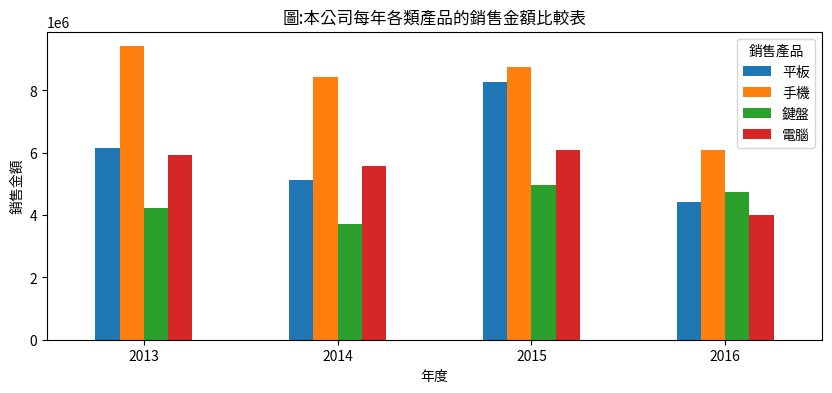

In [ ]:
df10=df.groupby([df["銷售日期"].dt.year,"銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level="銷售產品")
df10.columns=["平板","手機","鍵盤","電腦"]
df10.columns.names=["銷售產品"]
df10.plot(kind="bar",legend=True,rot=0,title="圖:本公司每年各類產品的銷售金額比較表",figsize=(10,4))
plt.xlabel("年度")
plt.ylabel("銷售金額")
plt.show()

In [ ]:
df10=df.groupby([df["銷售日期"].dt.year,"銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level="銷售產品")
df10.columns=["平板","手機","鍵盤","電腦"]
df10.columns.names=["銷售產品"]
df10.index.name="銷售年份"
df10

銷售產品,平板,手機,鍵盤,電腦
銷售年份,,,,
2013,6145110,9413364,4225562,5943769
2014,5113377,8422415,3713809,5589171
2015,8271980,8738825,4954596,6095193
2016,4420499,6074618,4752043,3992509


# 分析51：統計分析，本公司歷年各季各類產品的銷售金額比較表
**方法限定1：若沒有先建立欄位『季』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df11=df.groupby(df["銷售日期"].dt.quarter).agg({"銷售金額":"sum"})
df11.index.name="季"
df11

,銷售金額
季,
1,25146558
2,24339733
3,27645918
4,18734631


# 分析52：統計分析，本公司每季各類產品的銷售金額比較表
**方法限定1：若沒有先建立欄位『季』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df12=df.groupby([df["銷售日期"].dt.quarter,"銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level=1)
df12.index.name="季"
df12

銷售金額                            
銷售產品       平板        手機       鍵盤       電腦
季                                        
1     5865385   7936887  5639428  5704858
2     7144874   7822798  4088637  5283424
3     6164903  10392942  5246786  5841287
4     4775804   6496595  2671159  4791073

# 分析53：統計分析，本公司『每年，每季』的銷售金額比較表
**方法限定1：若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df13=df.groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=1)
df13.columns=[1,2,3,4]
df13.columns.name="季"
df13.index.name="年"
df13

季,1,2,3,4
年,,,,
2013,6820922,6775792,6953252,5177839
2014,6578504,5725217,5977272,4557779
2015,6886600,7077588,6801437,7294969
2016,4860532,4761136,7913957,1704044


# 分析54：（挑戰題）分析最近2年(8季)，本公司每個業務單位的業績表現
**方法限定1：若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析，該如何做？**

In [ ]:
df14=df.groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter,"業務單位"]).agg({"銷售金額":"sum"})\
  .unstack(level=2)
df14.index.names=["年","季"]
df14.columns=["業務1","業務2","業務3","業務4"]
df14.columns.name="業務單位"
df14.loc[2015:2016]
#df14.iloc[8:]
#df14.iloc[-8:]

業務單位        業務1      業務2      業務3      業務4
年    季                                    
2015 1  3885552  1274939  1209055   517054
     2  2892236  1478589   962515  1744248
     3  2659285  1321406  1515743  1305003
     4  2874296  1838577   982486  1599610
2016 1  1848732   679138   997070  1335592
     2  2121699  1194480   675461   769496
     3  4100986  1724691   815959  1272321
     4   658829   237497   251428   556290

# 分析55：（接續上一題）畫圖：分析業務單位：『業務1』最近2年(8季)，業績表現
**方法限定1：若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析，該如何做？**

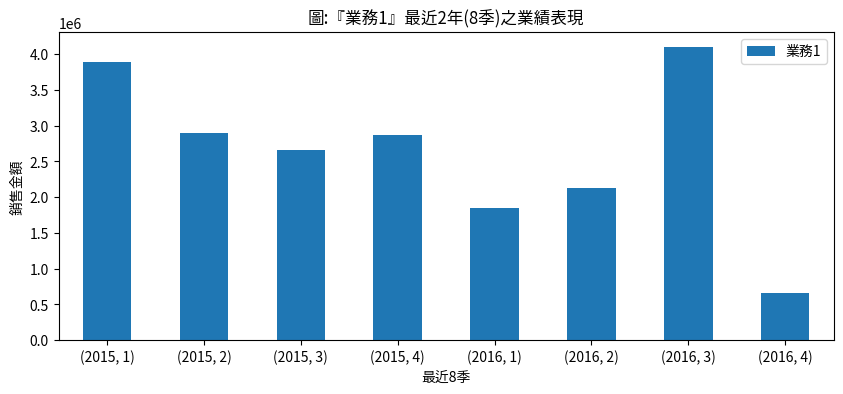

In [ ]:
import matplotlib.pyplot as plt

df14=df.groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter,"業務單位"]).agg({"銷售金額":"sum"})\
  .unstack(level=2)
#df14.index.names=["年","季"]
df14.columns=["業務1","業務2","業務3","業務4"]
#df14.columns.name="業務單位"
df14.loc[2015:2016]["業務1"].plot(kind="bar",legend=True,rot=0,title="圖:『業務1』最近2年(8季)之業績表現",figsize=(10,4))

plt.xlabel("最近8季")
plt.ylabel("銷售金額")
plt.show()

# 分析56：（接續上一題）畫圖：分析『業務1』，『最近2年，每季』業績表現
**方法限定1：若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析，該如何做？**

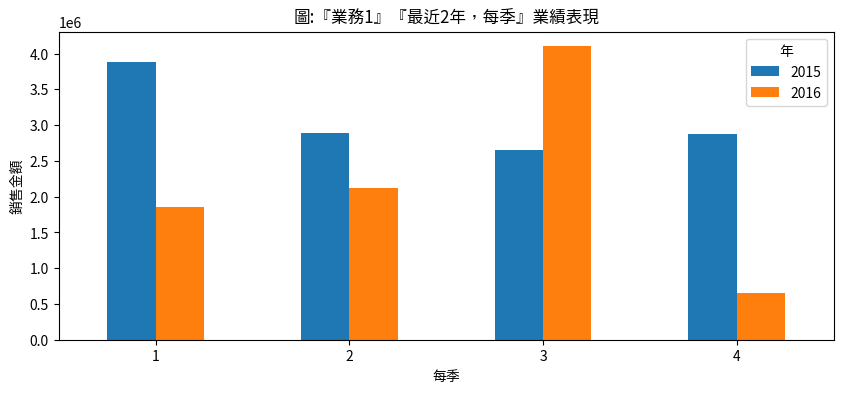

In [ ]:
df15=df.groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter,"業務單位"]).agg({"銷售金額":"sum"})\
  .unstack(level=0)\
  .groupby("銷售日期")\
  .first() #季
df15.columns=[2013,2014,2015,2016]
df15.columns.name="年"
df15.index.name="季"
df15[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:『業務1』『最近2年，每季』業績表現",figsize=(10,4))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

# 分析57：（接續上一題）畫圖：分析『業務2～4』，『最近2年，每季』業績表現

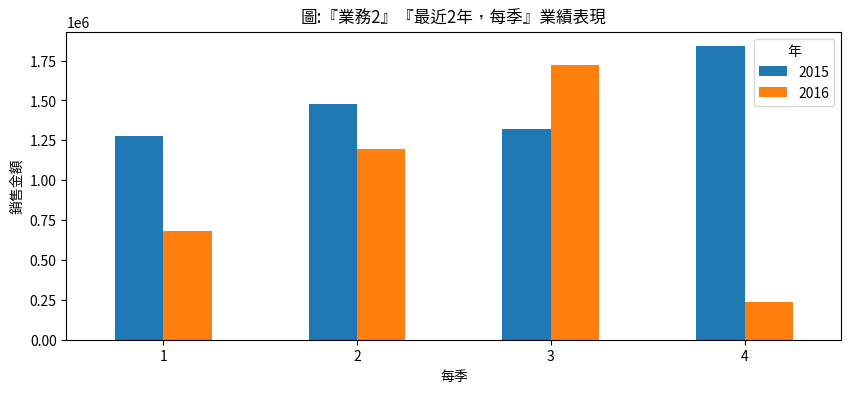

In [ ]:
a1=(df["業務單位"]=="業務2")
df15=df[a1].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df15.columns=[2013,2014,2015,2016]
df15.columns.name="年"
df15.index.name="季"
df15[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:『業務2』『最近2年，每季』業績表現",figsize=(10,4))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

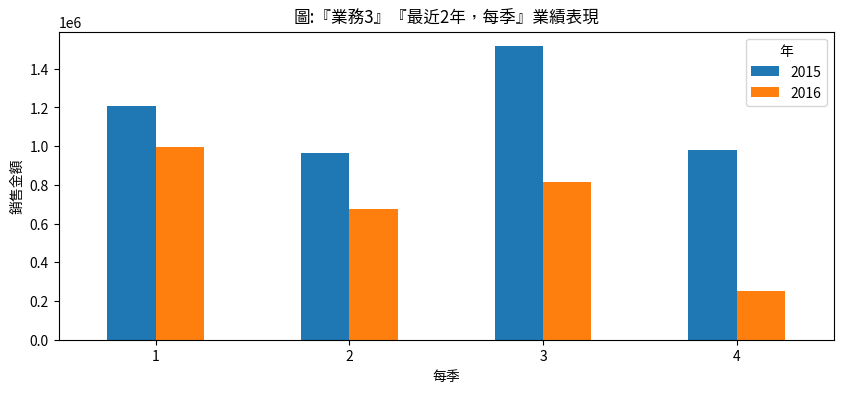

In [ ]:
a2=(df["業務單位"]=="業務3")
df15=df[a2].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df15.columns=[2013,2014,2015,2016]
df15.columns.name="年"
df15.index.name="季"
df15[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:『業務3』『最近2年，每季』業績表現",figsize=(10,4))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

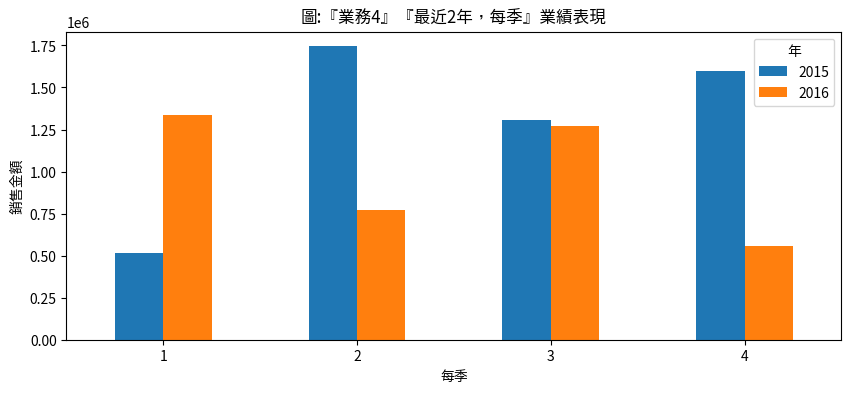

In [ ]:
a1=(df["業務單位"]=="業務4")
df15=df[a1].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df15.columns=[2013,2014,2015,2016]
df15.columns.name="年"
df15.index.name="季"
df15[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:『業務4』『最近2年，每季』業績表現",figsize=(10,4))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

# 分析58：畫4個圖：分析產品『手機，平板，鍵盤，電腦』，『最近2年，每季』業績表現
**方法限定1：若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析，該如何做？**

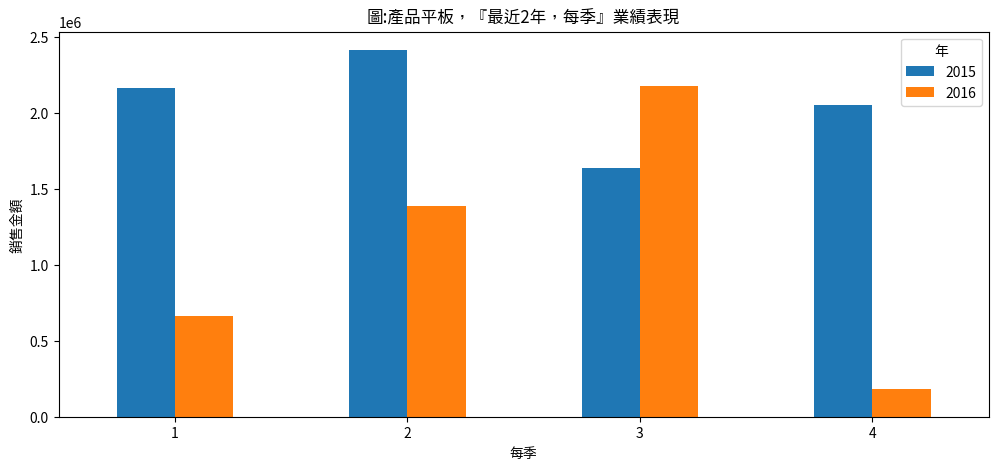

In [ ]:
a1=(df["銷售產品"]=="平板")
df16=df[a1].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df16.columns=[2013,2014,2015,2016]
df16.columns.name="年"
df16.index.name="季"
df16[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:產品平板，『最近2年，每季』業績表現",figsize=(12,5))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

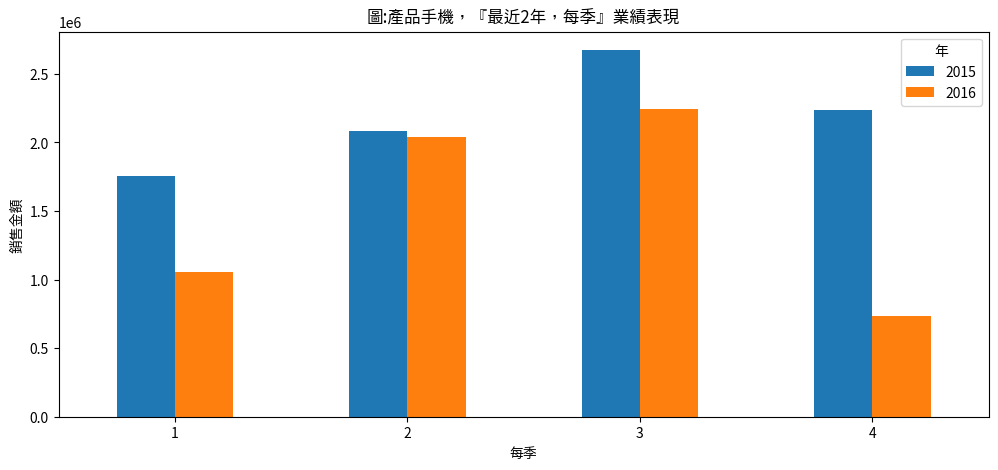

In [ ]:
a2=(df["銷售產品"]=="手機")
df16=df[a2].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df16.columns=[2013,2014,2015,2016]
df16.columns.name="年"
df16.index.name="季"
df16[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:產品手機，『最近2年，每季』業績表現",figsize=(12,5))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

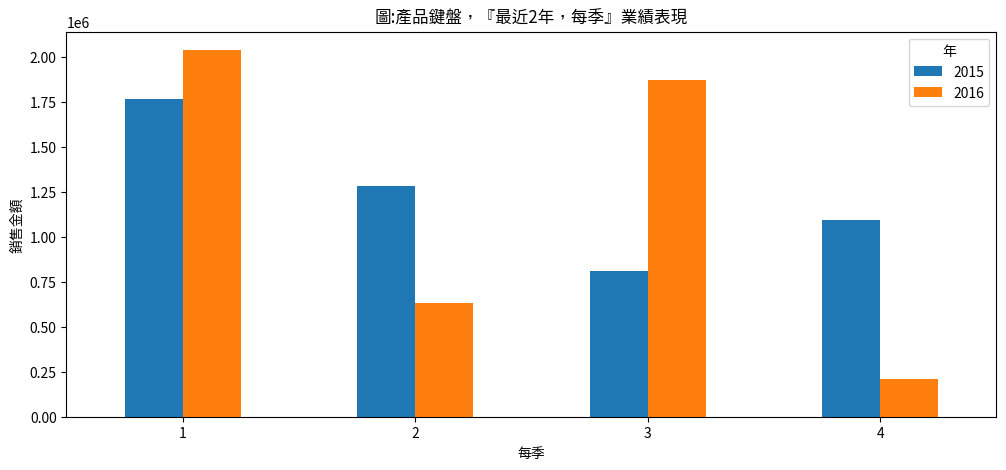

In [ ]:
a3=(df["銷售產品"]=="鍵盤")
df16=df[a3].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df16.columns=[2013,2014,2015,2016]
df16.columns.name="年"
df16.index.name="季"
df16[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:產品鍵盤，『最近2年，每季』業績表現",figsize=(12,5))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

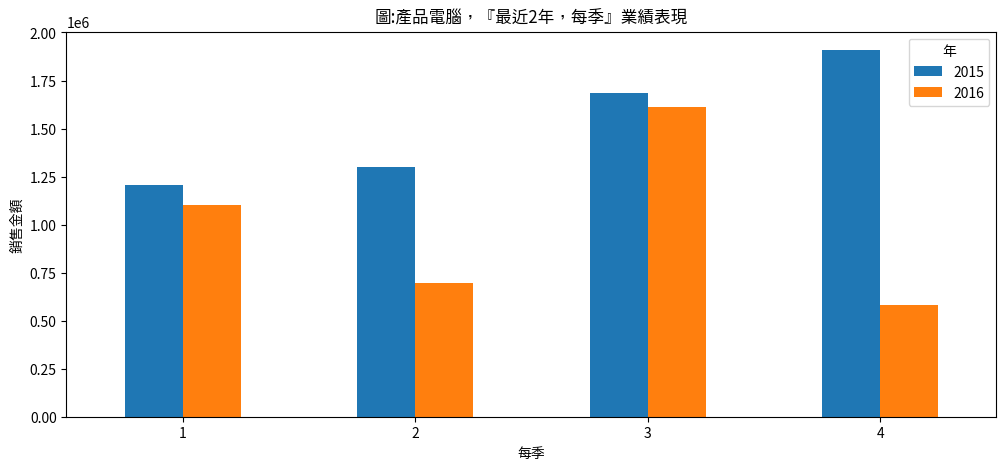

In [ ]:
a4=(df["銷售產品"]=="電腦")
df16=df[a4].groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=0)

df16.columns=[2013,2014,2015,2016]
df16.columns.name="年"
df16.index.name="季"
df16[[2015,2016]].plot(kind="bar",legend=True,rot=0,title="圖:產品電腦，『最近2年，每季』業績表現",figsize=(12,5))
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

# 分析59：其它自己想要分析的角度，請自行創意分析（不限分析數量）

59-1

In [ ]:
#算出各產品以及各季的總金額
df1=df.groupby([df["銷售日期"].dt.quarter,"銷售產品"]).agg({"銷售金額":"sum"})\
  .unstack(level=1)
df1.index.name="季"

df1["總計"]=df1.sum(axis=1)
df1.loc["總計"]=df1.sum(axis=0)
df1

銷售金額                                      總計
銷售產品        平板        手機        鍵盤        電腦          
季                                                     
1      5865385   7936887   5639428   5704858  25146558
2      7144874   7822798   4088637   5283424  24339733
3      6164903  10392942   5246786   5841287  27645918
4      4775804   6496595   2671159   4791073  18734631
總計    23950966  32649222  17646010  21620642  95866840

59-2

In [ ]:
#顯示每年各季總金額以及各年每季總金額
df1=df.groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.quarter]).agg({"銷售金額":"sum"})\
  .unstack(level=1)
df1.columns=[1,2,3,4]
df1.columns.name="季"
df1.index.name="年"
df1["總計"] = df1.sum(axis=1)
df1.loc["總計"] = df1.sum(axis=0)
df1.style.format(thousands=',')

季,1,2,3,4,總計
年,,,,,
2013,"6,820,922","6,775,792","6,953,252","5,177,839","25,727,805"
2014,"6,578,504","5,725,217","5,977,272","4,557,779","22,838,772"
2015,"6,886,600","7,077,588","6,801,437","7,294,969","28,060,594"
2016,"4,860,532","4,761,136","7,913,957","1,704,044","19,239,669"
總計,"25,146,558","24,339,733","27,645,918","18,734,631","95,866,840"


59-3

In [ ]:
#顯示每一年的旺季與淡季，旺季以黃色表示，淡季以粉紅色表示
df1=df.groupby([df["銷售日期"].dt.quarter,df["銷售日期"].dt.year]).agg({"銷售金額":"sum"})\
  .unstack(level=1)
df1.columns=[2013,2014,2015,2016]
df1.columns.name="年"
df1.index.name="季"
df1.style.format(thousands=',').highlight_max(color="yellow").highlight_min(color="pink")

年,2013,2014,2015,2016
季,,,,
1,"6,820,922","6,578,504","6,886,600","4,860,532"
2,"6,775,792","5,725,217","7,077,588","4,761,136"
3,"6,953,252","5,977,272","6,801,437","7,913,957"
4,"5,177,839","4,557,779","7,294,969","1,704,044"


59-4

In [ ]:
#每個月銷售金額最高與最低標註
df1=df.groupby(df["銷售日期"].dt.month_name()).agg({"銷售金額":"sum"})\
  .style.highlight_max().highlight_min(color="pink")
df1.index.name="銷售月份"
df1

,銷售金額
銷售月份,
April,7797925
August,8773711
December,4783808
February,8113139
January,9739357
July,10860019
June,7888861
March,7294062
May,8652947


59-5

In [ ]:
#四年各月份的銷售金額
df1=df.groupby([df["銷售日期"].dt.year,df["銷售日期"].dt.month]).agg({"銷售金額":"sum"})\
  .unstack(level=0)\
  .fillna(0)
df1.columns=[2013,2014,2015,2016]
df1.columns.name="銷售年份"
df1.index.name="銷售月份"

df1.style.highlight_max().highlight_min(color="pink")\
  .set_precision(0)

<ipython-input-171-eefdfefa274d>:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(0)


銷售年份,2013,2014,2015,2016
銷售月份,,,,
1,2403639,2480484,2824347,2030887
2,2965207,1977781,1933760,1236391
3,1452076,2120239,2128493,1593254
4,1811923,2129114,1631400,2225488
5,2046698,1590007,3134686,1881556
6,2917171,2006096,2311502,654092
7,3109491,2102850,2231590,3416088
8,2045607,1744288,2682844,2300972
9,1798154,2130134,1887003,2196897


# 60.結案報告：
#請根據上述的數據分析，從各種角度，告訴公司主管：找出業績下降的原因，以及如何改善。
從各種不同角度分析，包括：『不同業務單位，不同業務員，不同業務員，不同產品，逐年，每季，每月』的分析

# **請多用定量描述的方式，來證明你分析觀點的可靠性、準確性與權威性，以建立個人數據分析的品牌與形象。**

從以上的數據分析，根據以下角度進行說明
##**針對不同業務單位:**

我們可以從分析3看到:業務1是年度銷售總金額最高的而業務3是銷售金額最少的
(視覺化: 分析5,6,7螢光筆標註, 11,12交叉分析圖)

我們可以從分析31,33看到: 欄的總和百分比各業務單位賣各種不同產品，表現最好的單位是業務1
##**針對不同業務員:**
我們可以從分析13看到:業務員銷售金額最高的是Terry，銷售金額達14141090、最低的是Mary，銷售金額為2817989，相差了11323101元

我們可以從分析17看到:每個單位銷售金額第一名者，分別為業務1的Terry，業務2的Eric,業務3的Steve,業務4的Simon(視覺化:分析22、23螢光筆標註)

分析20:每個單位銷售金額最後一名,分別為業務1的John，業務2的Alisa,業務3的Mary,業務4的Robin

##**針對不同產品:**
我們可以從分析24看到:手機是銷售金額中最高的，鍵盤在大部分的業務單位中則是最低的，尤其是業務4，與銷售金額最高的手機相差535萬6千(視覺化:分析27交叉分析圖)

我們可以從分析30看到:業務單位銷售總合中，再次驗證了業務1銷售金額最高而業務3最低的事實 ; 產品銷售總和中手機金額最高、鍵盤最低

我們可以從分析34看到:列的總和百分比中，手機的市場熱度最高，鍵盤則比較冷門
##**逐年:**
我們從分析44可以看到:2016是銷售金額最低的一年，與最好的去年相比，也就是2015年相差甚遠(比較圖:分析46)

我們可以從分析49看到:各個產品逐年的銷售狀況，市場熱度最高的手機在2016年的銷售金額減少許多，有逐漸下滑的趨勢(比較圖:分析50)
##**每季:**
我們可以從分析52,59看到:第三季的銷售總金額最高代表賣得特別好而第四季是最差的，另外，2015年4季總金額最高，2016年4季總金額最差
##**每月:**
我們可以從分析59第4個分析看到:7月暑假的時候市場比較活絡，到了快年底的12月銷售數字比較差
#**原因:**
我們可以從分析53看到，2016年的銷售數字特別低，並透過分析59-5可知，11月與12月的銷售數字甚至為0，這很有可能代表這2個月公司休業，老闆出去玩關店2個月或代表公司在所有產品上的庫存嚴重缺乏導致無法營業。相較去年下降這麼多，就是因為這兩個月的影響。

#**建議:**
**產品的淡季與旺季** : 從每季、每月結果來看，可以看出第三季接近暑假時為本公司的旺季，而年底第四季則是淡季，可能有幾個原因，像是學生在暑假期間通常會購買或升級他們的電腦、手機等3C產品，以應對新的學年或學業需求。另外一些公司會在第三季推出新產品或更新版本，這激發了消費者的興趣和需求，促使他們在旺季期間進行購買。
在這段時間，如果可以**提供更多促銷和特價活動**，會吸引更多的消費者購買本公司的產品。

**針對不同產品**:手機佔銷售金額大宗，但是趨勢好像走下坡，建議在技術創新下要有所提升以及分析目標市場，了解當地的消費者喜好和需求，並針對性地推出產品和行銷活動，另外，鍵盤的銷售數字是相對差的，可以提供一個套餐或促銷組合與電腦或平板一同銷售，提高鍵盤的銷售金額並吸引更多客戶。
